# Titanic data set

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
test_x=test.drop('PassengerId',1)
train_x=train.drop('PassengerId',1)

In [3]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The ticket column is probably not important. There is seemingly no patterns in there. We will drop this column.

In [4]:
train_x=train_x.drop(['Ticket'],1)
test_x=test_x.drop(['Ticket'],1)

In [5]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Let's see which columns have missing values.

In [6]:
print(train_x.isnull().sum() /train_x.shape[0])
print(test_x.isnull().sum() /test_x.shape[0])

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64


## Most of the cabin information is unknown. We could either choose to drop this column, or assume that people with Cabin = 'NaN' simply didn't have a cabin. We will go with this second assumption for now. For the age and the fare, we will replace the missing values with the median age.

In [7]:
median_age=np.median(train_x['Age'].dropna())
train_x['Age']=train_x['Age'].fillna(median_age)
median_age=np.median(test_x['Age'].dropna())
test_x['Age']=test_x['Age'].fillna(median_age)
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].dropna().median())

In [8]:
train_x.loc[train_x['Cabin'].isnull(), 'Cabin'] = 0
train_x.loc[train_x['Cabin'] != 0, 'Cabin'] = 1
test_x.loc[test_x['Cabin'].isnull(), 'Cabin'] = 0
test_x.loc[test_x['Cabin'] != 0, 'Cabin'] = 1

## Let's see what we have so far

In [9]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


## Does it matter where a passenger embarks from? Maybe. We will assign a numeric value to each of the Embarked zones.

In [10]:
train_x['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## First we will replace nan values with the max of (S, C, Q). Then we assign an int to each value.

In [11]:
train_x['Embarked']=train_x['Embarked'].fillna('S')
test_x['Embarked']=test_x['Embarked'].fillna('S')
print(train_x['Embarked'][train_x['Embarked']=='S'].count())
print(train_x['Embarked'][train_x['Embarked']=='C'].count())
print(train_x['Embarked'][train_x['Embarked']=='Q'].count())


646
168
77


In [12]:
train_x['Embarked']=train_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})
test_x['Embarked']=test_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})

In [13]:
#No more empty values
print(train_x.isnull().sum() /train_x.shape[0])
print(test_x.isnull().sum() /test_x.shape[0])

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64


In [14]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0


## Replace male by 0 and female by 1. Alternatively we could one-hot encode these variables for better param learning.

In [15]:
train_x['Sex']=train_x['Sex'].replace('male',0)
train_x['Sex']=train_x['Sex'].replace('female',1)
test_x['Sex']=test_x['Sex'].replace('male',0)
test_x['Sex']=test_x['Sex'].replace('female',1)

In [16]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0


## Let's check how the indicators are linearly correlated with the survival.

In [17]:
train_x_copied = train_x.copy()
test_x_copied = test_x.copy()
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Embarked    0.106811
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The sex, the fare, the class and the embarkment location seem to have some correlation with the survival rate. The others are not well correlated. Can we engineer better features?

## Let's see  how the fare price is distributed in order to bin the values.

In [18]:
print(train_x['Fare'].max())
print(train_x['Fare'].std())

train_x = train_x_copied.copy()
test_x =   test_x_copied.copy()

512.3292
49.693428597180905


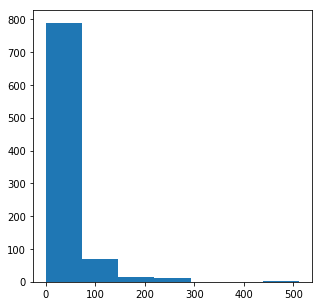

In [19]:
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Fare'], bins=7)

In [20]:
values

(array([ 789.,   71.,   15.,   13.,    0.,    0.,    3.]),
 array([   0.        ,   73.18988571,  146.37977143,  219.56965714,
         292.75954286,  365.94942857,  439.13931429,  512.3292    ]),
 <a list of 7 Patch objects>)

## Run the following cell if you want Fare binning according to the above plot.

In [21]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Fare'] < values[1][i]) & (train_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
    test_x.loc[(test_x['Fare'] < values[1][i]) & (test_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Fare        0.077097
Parch       0.081629
Embarked    0.106811
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The linear correlation dropped from 0.25 to 0.077. We cannot say if this reduces the effectiveness of prediction simply because the linear correlation value dropped. It might actually help fight overfitting. We will test this in the prediction part.

In [22]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0.0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,0.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0.0,0,0


## Let's see how the age is distributed in order to bin the values.

In [23]:
print(train_x['Age'].max())
print(train_x['Age'].min())
print(train_x['Age'].std())

80.0
0.42
13.019696550973194


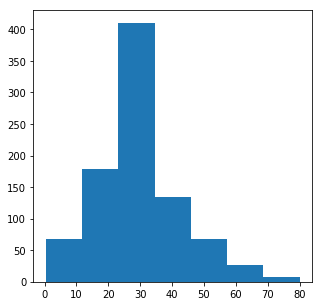

In [24]:
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Age'], bins=7)

In [25]:
values

(array([  68.,  178.,  410.,  134.,   68.,   26.,    7.]),
 array([  0.42      ,  11.78857143,  23.15714286,  34.52571429,
         45.89428571,  57.26285714,  68.63142857,  80.        ]),
 <a list of 7 Patch objects>)

## Run the following cell if you want Age binning according to the above plot.

In [26]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Age'] < values[1][i]) & (train_x['Age'] >= values[1][i-1]),'Age'] = i-1
    test_x.loc[(test_x['Age'] < values[1][i]) & (test_x['Age'] >= values[1][i-1]),'Age'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
SibSp      -0.035322
Age         0.018445
Fare        0.077097
Parch       0.081629
Embarked    0.106811
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The linear correlation changed from -0.06 to 0.018. We cannot say if this reduces the effectiveness of prediction simply because the linear correlation value dropped. It might actually help fight overfitting. We will test this in the prediction part.

In [27]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0.0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,0.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,0.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,0.0,1,0
4,0,3,"Allen, Mr. William Henry",0,3.0,0,0,0.0,0,0


# PREDICTIONS: Random forest classifier, AdaBoost Classifier and SVM

In [28]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV as GS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

rfc = RFC()
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
abc= ABC()
scores = cross_val_score(abc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
svc= SVC()
scores = cross_val_score(svc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross-validated scores: 0.786887129724
Cross-validated scores: 0.79350329134
Cross-validated scores: 0.826038474634


## RFC with grid search

In [29]:
parameters = {'n_estimators':(10,20,40,70),
                'criterion':("gini","entropy"),
              'max_depth':(None, 1, 2, 4, 6),
              'min_samples_split': (2, 3, 4)
              
             }

gs = GS(estimator=RFC(random_state=9999), param_grid=parameters,n_jobs=-1,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 307 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1185 out of 1200 | elapsed:   19.1s remaining:    0.1s


Best score: 0.834
Best parameters set:
	criterion: 'entropy'
	max_depth: 6
	min_samples_split: 3
	n_estimators: 40


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   19.4s finished


## Let's do some feature elimination to see which features to remove

In [30]:
rfc=RFC(n_estimators=40, max_depth=4,min_samples_split=3,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.821594313926
Cross-validated scores without:  Pclass 0.819347122915
Cross-validated scores without:  Sex 0.725200034048
Cross-validated scores without:  Age 0.805925831347
Cross-validated scores without:  SibSp 0.82274287822
Cross-validated scores without:  Parch 0.821632050846
Cross-validated scores without:  Fare 0.824977584837
Cross-validated scores without:  Cabin 0.820457950289
Cross-validated scores without:  Embarked 0.812554761094


## Let's remove fare and redo the elimination

In [31]:
rfc=RFC(n_estimators=40, max_depth=4,min_samples_split=3,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.824977584837
Cross-validated scores without:  Pclass 0.820445465895
Cross-validated scores without:  Sex 0.715124560209
Cross-validated scores without:  Age 0.805901146294
Cross-validated scores without:  SibSp 0.81372886165
Cross-validated scores without:  Parch 0.821582113268
Cross-validated scores without:  Cabin 0.815938032005
Cross-validated scores without:  Embarked 0.801443649983


In [32]:
rfc=RFC(n_estimators=40, max_depth=4,min_samples_split=3,criterion='entropy',random_state=9999 )
rfc.fit(train_x.drop(['Survived','Name','Fare'],1), train_x['Survived'])
rfc.feature_importances_

array([ 0.16340072,  0.48395491,  0.06339524,  0.05528736,  0.05231016,
        0.12494959,  0.05670203])

## Results of RFC

### With age and fare binning, accuracy=  0.78468, and 0.78947 without fare
### Without age and fare binning, accuracy =  0.76076



## ABC with grid search

In [33]:
parameters = {
              'n_estimators':(50,10,20,30,100),
             'learning_rate':(1.0,0.2,0.5,0.9,0.4,2,4,5)
             }

gs = GS(estimator=ABC(random_state=9999), param_grid=parameters,n_jobs=-1,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 385 out of 400 | elapsed:   12.0s remaining:    0.4s


Best score: 0.820
Best parameters set:
	learning_rate: 1.0
	n_estimators: 10


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.4s finished


## Let's do some feature elimination to see which features to remove

In [35]:
abc=ABC(n_estimators= 10, learning_rate=1,random_state=9999)
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(abc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(abc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.820458234026
Cross-validated scores without:  Pclass 0.800257632505
Cross-validated scores without:  Sex 0.709506582681
Cross-validated scores without:  Age 0.800257065032
Cross-validated scores without:  SibSp 0.801369027352
Cross-validated scores without:  Parch 0.81369112473
Cross-validated scores without:  Fare 0.817087447509
Cross-validated scores without:  Cabin 0.813741346045
Cross-validated scores without:  Embarked 0.800194926796


## There doesn't seem to be anything worth removing!

In [34]:
abc=ABC(n_estimators= 50, learning_rate=0.9,random_state=9999)
abc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
abc.feature_importances_

array([ 0.16,  0.08,  0.18,  0.08,  0.2 ,  0.22,  0.02,  0.06])

## Results of ABC

### With age and fare binning, accuracy=  0.74641
### Without age and fare binning, accuracy =  0.75119

## SVC with grid search

In [36]:
parameters = {
              'C':(0.1,1,10,20,50),
             }

gs = GS(estimator=SVC(random_state=9999), param_grid=parameters,n_jobs=2,verbose=True,cv=3)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best score: 0.822
Best parameters set:
	C: 1


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    2.1s finished


## Let's do some feature elimination to see which features to remove

In [37]:
svc=SVC(random_state=9999, C=1)
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(svc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(svc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.826038474634
Cross-validated scores without:  Pclass 0.826076211554
Cross-validated scores without:  Sex 0.736373567132
Cross-validated scores without:  Age 0.803577630235
Cross-validated scores without:  SibSp 0.812554477358
Cross-validated scores without:  Parch 0.815887810691
Cross-validated scores without:  Fare 0.824940131654
Cross-validated scores without:  Cabin 0.826063727159
Cross-validated scores without:  Embarked 0.826051242765


## Nothing to remove here

In [38]:
svc=SVC(random_state=9999, C=1)
svc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9999, shrinking=True,
  tol=0.001, verbose=False)

## Results of SVC

### With age and fare binning, accuracy=  0.78947
### Without age and fare binning, accuracy =  0.65071



In [39]:
res=rfc.predict(test_x.drop(['Name','Fare'],1))

In [40]:
n_points = res.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = test['PassengerId']
y_pred_pp[:, 1] = res
np.savetxt('rfc.csv', y_pred_pp, fmt='%d', delimiter=',',header="PassengerId,Survived",comments='')

## Does it matter if you're a Miss or a Countess?
## In this section, we extract the "Title"of each passenger and add these titles as a feature

In [42]:
names = list(train_x['Name'])
names_test=list(test_x['Name'])

titles=[]
for name in names:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles.append(tmp[0].strip())
    
titles_test=[]
for name in names_test:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles_test .append(tmp[0].strip()) 
    
train_x['Titles']=titles
test_x['Titles']=titles_test

print(train_x['Titles'].unique())
print(test_x['Titles'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [43]:
print(train_x['Titles'].loc[train_x['Titles']=='Mr'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Mrs'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Miss'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Master'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Don'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Rev'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Dr'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Mme'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Ms'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Major'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Lady'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Sir'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Mlle'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Col'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Capt'].count())
print(train_x['Titles'].loc[train_x['Titles']=='the Countess'].count())
print(train_x['Titles'].loc[train_x['Titles']=='Jonkheer'].count())


517
125
182
40
1
6
7
1
1
2
1
1
2
2
1
1
1


## We will map Mme to Mrs, Ms and Mlle to Miss. Everything under the frequency of 10 will be mapped to a new value called other.

In [44]:
train_x['Titles']=train_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Don':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })


test_x['Titles']=test_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Dona':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })


print(train_x['Titles'].unique())
print(test_x['Titles'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


## Now we shall map these new values to ints

In [45]:
train_x['Titles']=train_x['Titles'].replace({'Mr':0, 'Mrs':1, 'Miss':2,'Master':3, 'Other':4
                                            
                                            })

test_x['Titles']=test_x['Titles'].replace({'Mr':0, 'Mrs':1, 'Miss':2,'Master':3, 'Other':4
                                            
                                            })



In [46]:
train_x.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titles
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0.0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,0.0,1,1,1


In [47]:
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
SibSp      -0.035322
Age         0.018445
Fare        0.077097
Parch       0.081629
Embarked    0.106811
Titles      0.405921
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

## The titles seem to be well correlated with survival.

# Here goes another round of predictions with titles!

# In this section we also add the Gradient boosted classifier and the logistic regression classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV as GS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics


lr = LR(random_state=9999)
scores = cross_val_score(lr, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
gbc = GBC(random_state=9999)
scores = cross_val_score(gbc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
rfc = RFC(random_state=9999)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
abc= ABC(random_state=9999)
scores = cross_val_score(abc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
svc= SVC(random_state=9999)
scores = cross_val_score(svc,train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.797959085234
Cross-validated scores: 0.823829304279
Cross-validated scores: 0.795838440586
Cross-validated scores: 0.818236579276
Cross-validated scores: 0.828273181251


## RFC with grid search

In [49]:
parameters = {'n_estimators':(10,20,40,70,100,150),
                'criterion':("gini","entropy"),
              'max_depth':(None, 1, 2, 4, 6),
              'min_samples_split': (2, 3, 4),
             }

gs = GS(estimator=RFC(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 350 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 850 tasks      | elapsed:   24.1s
[Parallel(n_jobs=4)]: Done 1550 tasks      | elapsed:   44.0s


Best score: 0.834
Best parameters set:
	criterion: 'entropy'
	max_depth: 6
	min_samples_split: 2
	n_estimators: 100


[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:   51.6s finished


## By comparing the cross validated result of RFC with titles and without titles, we can see that there isn't much of a difference. However, let's carry on with the feature elimination.

## Let's do some feature elimination to see which features to remove

In [50]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=5)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=5)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.82387013629
Cross-validated scores without:  Pclass 0.824937025385
Cross-validated scores without:  Sex 0.829462863684
Cross-validated scores without:  Age 0.817141046469
Cross-validated scores without:  SibSp 0.811510372947
Cross-validated scores without:  Parch 0.828339268179
Cross-validated scores without:  Fare 0.828333062036
Cross-validated scores without:  Cabin 0.826073245958
Cross-validated scores without:  Embarked 0.822721219723
Cross-validated scores without:  Titles 0.825012563006


## Let's remove fare and redo the elimination

In [51]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.832768130746
Cross-validated scores without:  Pclass 0.831644251504
Cross-validated scores without:  Sex 0.822717909431
Cross-validated scores without:  Age 0.823841504937
Cross-validated scores without:  SibSp 0.816026273976
Cross-validated scores without:  Parch 0.827225059585
Cross-validated scores without:  Cabin 0.823866757462
Cross-validated scores without:  Embarked 0.823804051753
Cross-validated scores without:  Titles 0.821594313926


## Remove Sex

In [52]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare','Sex'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare','Sex'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.822717909431
Cross-validated scores without:  Pclass 0.827162353876
Cross-validated scores without:  Age 0.823841504937
Cross-validated scores without:  SibSp 0.817162637612
Cross-validated scores without:  Parch 0.830558109182
Cross-validated scores without:  Cabin 0.82269237317
Cross-validated scores without:  Embarked 0.821543808875
Cross-validated scores without:  Titles 0.719606174101


## Remove Parch

In [53]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
new_c=train_x.drop(['Survived','Name','Fare','Sex','Parch'],1)
scores = cross_val_score(rfc, train_x.drop(['Survived','Name','Fare','Sex','Parch'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.830558109182
Cross-validated scores without:  Pclass 0.817062194984
Cross-validated scores without:  Age 0.827225343321
Cross-validated scores without:  SibSp 0.814940699126
Cross-validated scores without:  Cabin 0.824977584837
Cross-validated scores without:  Embarked 0.819321870389
Cross-validated scores without:  Titles 0.696023152877


In [54]:
rfc=RFC(n_estimators=100, max_depth=6,min_samples_split=2,criterion='entropy',random_state=9999 )
rfc.fit(train_x.drop(['Survived','Name','Parch'],1), train_x['Survived'])
rfc.feature_importances_

array([ 0.11419857,  0.24974461,  0.07643381,  0.08714567,  0.04523087,
        0.0843818 ,  0.03312289,  0.30974179])

## Results of RFC

### With age and fare binning, accuracy=  0.80382



## SVC with grid search

In [55]:
parameters = {
              'C':(0.001,0.01,0.1,1,10,20,50,100,1000),
             }

gs = GS(estimator=SVC(random_state=9999), param_grid=parameters,n_jobs=2,verbose=True,cv=3)
gs.fit(train_x.drop(['Survived','Name','Parch'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best score: 0.832
Best parameters set:
	C: 10


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    2.5s finished


## Feature elimination

In [56]:
svc=SVC(random_state=9999, C=10)
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(svc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(svc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.831644251504
Cross-validated scores without:  Pclass 0.827124616956
Cross-validated scores without:  Sex 0.823804051753
Cross-validated scores without:  Age 0.826076211554
Cross-validated scores without:  SibSp 0.812655487459
Cross-validated scores without:  Parch 0.828298433776
Cross-validated scores without:  Fare 0.821569345137
Cross-validated scores without:  Cabin 0.829409544887
Cross-validated scores without:  Embarked 0.815951367609
Cross-validated scores without:  Titles 0.826051242765


In [57]:
svc=SVC(random_state=9999, C=10)
svc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9999, shrinking=True,
  tol=0.001, verbose=False)

## Boosting with gridsearch

In [58]:
parameters = {'n_estimators':(10,20,40,70,100,150,300),
              'max_depth':(1, 2,3, 4, 6),
              'min_samples_split': (2, 3, 4),
              'learning_rate': (0.1, 0.2)
             }

gs = GS(estimator=GBC(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=10)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


[Parallel(n_jobs=4)]: Done  71 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 1073 tasks      | elapsed:   30.1s


Best score: 0.835
Best parameters set:
	learning_rate: 0.1
	max_depth: 2
	min_samples_split: 2
	n_estimators: 70


[Parallel(n_jobs=4)]: Done 2100 out of 2100 | elapsed:   56.5s finished


## Feature elimination

In [59]:
gbc=GBC(random_state=9999, n_estimators=70,max_depth=2,learning_rate=0.1,min_samples_split=2)
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(gbc, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(svc, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.835015038021
Cross-validated scores without:  Pclass 0.827124616956
Cross-validated scores without:  Sex 0.823804051753
Cross-validated scores without:  Age 0.826076211554
Cross-validated scores without:  SibSp 0.812655487459
Cross-validated scores without:  Parch 0.828298433776
Cross-validated scores without:  Fare 0.821569345137
Cross-validated scores without:  Cabin 0.829409544887
Cross-validated scores without:  Embarked 0.815951367609
Cross-validated scores without:  Titles 0.826051242765


In [60]:
gbc=GBC(random_state=9999, n_estimators=70,max_depth=2,learning_rate=0.1,min_samples_split=2)
gbc.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=9999, subsample=1.0, verbose=0,
              warm_start=False)

# Logistic regression with gridsearch

In [61]:
parameters = {'penalty':['l1','l2'],
              'fit_intercept':[True,False],
              'C':[0.1,1,10,20,50,100,500,1000]}

gs = GS(estimator=LR(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=8)
gs.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 8 folds for each of 32 candidates, totalling 256 fits


[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    4.2s


Best score: 0.806
Best parameters set:
	C: 100
	fit_intercept: True
	penalty: 'l1'


[Parallel(n_jobs=4)]: Done 256 out of 256 | elapsed:    4.6s finished


In [63]:
#CROSS VALIDATION WITH FEATURE REMOVAL
log_reg = LR(C=1, fit_intercept=True, penalty="l2")
new_c=train_x.drop(['Survived','Name'],1)
scores = cross_val_score(log_reg, train_x.drop(['Survived','Name'],1), train_x['Survived'], cv=8)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), train_x['Survived'], cv=8)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.796836426524
Cross-validated scores without:  Pclass 0.797983027671
Cross-validated scores without:  Sex 0.751047151047
Cross-validated scores without:  Age 0.794594228969
Cross-validated scores without:  SibSp 0.792361903299
Cross-validated scores without:  Parch 0.801290474728
Cross-validated scores without:  Fare 0.793447627823
Cross-validated scores without:  Cabin 0.796836426524
Cross-validated scores without:  Embarked 0.80019487832
Cross-validated scores without:  Titles 0.796887431262


In [64]:
lr= LR(C=1, fit_intercept=True, penalty="l2")
lr.fit(train_x.drop(['Survived','Name'],1), train_x['Survived'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
res=gbc.predict(test_x.drop(['Name'],1))

In [66]:
n_points = res.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = test['PassengerId']
y_pred_pp[:, 1] = res
np.savetxt('gbc.csv', y_pred_pp, fmt='%d', delimiter=',',header="PassengerId,Survived",comments='')

# In all of the previous predictions, we encoded variables using numeric labels. For example, in the embarked feature, S was mapped to 1, C to 2 and Q to 3. However, usually algorithms assume that a higher value is more important, which is not something we want!
# What if we encode the variables using one-hot encoding? This would allow the alogorithm to learn a weight for each value.
# In the next section we one-hot encode a few of the features.

# One-hot encoding of sex, embarked, Pclass and Titles

In [67]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
test_x=test.drop('PassengerId',1)
train_x=train.drop('PassengerId',1)
train_x=train_x.drop(['Ticket'],1)
test_x=test_x.drop(['Ticket'],1)

In [68]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [69]:
median_age=np.median(train_x['Age'].dropna())
train_x['Age']=train_x['Age'].fillna(median_age)
median_age=np.median(test_x['Age'].dropna())
test_x['Age']=test_x['Age'].fillna(median_age)
train_x.loc[train_x['Cabin'].isnull(), 'Cabin'] = 0
train_x.loc[train_x['Cabin'] != 0, 'Cabin'] = 1
test_x.loc[test_x['Cabin'].isnull(), 'Cabin'] = 0
test_x.loc[test_x['Cabin'] != 0, 'Cabin'] = 1
train_x['Embarked']=train_x['Embarked'].fillna('S')
test_x['Embarked']=test_x['Embarked'].fillna('S')
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].dropna().median())

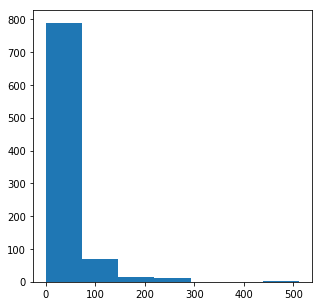

In [70]:
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Fare'], bins=7)

In [71]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Fare'] < values[1][i]) & (train_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
    test_x.loc[(test_x['Fare'] < values[1][i]) & (test_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Fare        0.077097
Parch       0.081629
Survived    1.000000
Name: Survived, dtype: float64

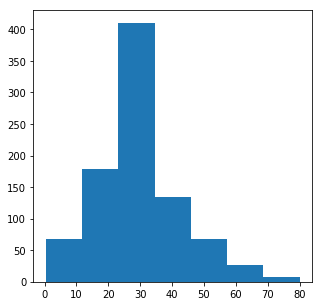

In [72]:
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Age'], bins=7)

In [73]:
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Age'] < values[1][i]) & (train_x['Age'] >= values[1][i-1]),'Age'] = i-1
    test_x.loc[(test_x['Age'] < values[1][i]) & (test_x['Age'] >= values[1][i-1]),'Age'] = i-1
train_x.corr()['Survived'].sort_values()

Pclass     -0.338481
SibSp      -0.035322
Age         0.018445
Fare        0.077097
Parch       0.081629
Survived    1.000000
Name: Survived, dtype: float64

In [74]:
names = list(train_x['Name'])
names_test=list(test_x['Name'])

titles=[]
for name in names:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles.append(tmp[0].strip())
    
titles_test=[]
for name in names_test:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles_test .append(tmp[0].strip()) 
    
train_x['Titles']=titles
test_x['Titles']=titles_test

print(train_x['Titles'].unique())
print(test_x['Titles'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [75]:
train_x['Titles']=train_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Don':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })


test_x['Titles']=test_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Dona':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })


print(train_x['Titles'].unique())
print(test_x['Titles'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [76]:
train_x.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titles
0,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,0.0,0,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,0.0,1,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,0.0,0,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,0.0,1,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,3.0,0,0,0.0,0,S,Mr


In [77]:
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import  LabelEncoder as LE

In [78]:
sex= [['male'], ['female']]
enc = LE()
enc.fit(train_x['Sex'])
new_sex = enc.transform(train_x['Sex'])
new_sex = new_sex.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_sex=ohe.fit_transform(new_sex)

enc.fit(test_x['Sex'])
new_sex_test = enc.transform(test_x['Sex'])
new_sex_test = new_sex_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_sex_test=ohe.fit_transform(new_sex_test)
encoded_sex_test.shape

(418, 2)

In [79]:
embarked= [['S'], ['C'],['Q']]
enc = LE()
enc.fit(train_x['Embarked'])
new_embarked = enc.transform(train_x['Embarked'])
new_embarked = new_embarked.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_embarked=ohe.fit_transform(new_embarked)

enc.fit(test_x['Embarked'])
new_embarked_test = enc.transform(test_x['Embarked'])
new_embarked_test = new_embarked_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_embarked_test=ohe.fit_transform(new_embarked_test)

In [80]:
Titles= [['Mrs'], ['Mr'],['Miss'],['Other']]
enc = LE()
enc.fit(train_x['Titles'])
new_Titles = enc.transform(train_x['Titles'])
new_Titles = new_Titles.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Titles=ohe.fit_transform(new_Titles)

enc.fit(test_x['Titles'])
new_Titles_test = enc.transform(test_x['Titles'])
new_Titles_test = new_Titles_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Titles_test=ohe.fit_transform(new_Titles_test)

In [81]:
train_x['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [82]:
Pclass= [[3], [1],[2]]
enc = LE()
enc.fit(Pclass)
new_Pclass = enc.transform(train_x['Pclass'])
new_Pclass = new_Pclass.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Pclass=ohe.fit_transform(new_Pclass)

enc.fit(Pclass)
new_Pclass_test = enc.transform(test_x['Pclass'])
new_Pclass_test = new_Pclass_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Pclass_test=ohe.fit_transform(new_Pclass_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
encoded_data=train_x.drop(['Sex','Titles','Embarked','Pclass'],1)
encoded_data_test=test_x.drop(['Sex','Titles','Embarked','Pclass'],1)
encoded_data_test.shape

(418, 6)

In [84]:
encoded_Pclass[:,:]

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [85]:
encoded_data['Female']=encoded_sex[:,0]
encoded_data['Male']=encoded_sex[:,1]
encoded_data['Mrs']=encoded_Titles[:,3]
encoded_data['Mr']=encoded_Titles[:,2]
encoded_data['Miss']=encoded_Titles[:,1]
encoded_data['Other']=encoded_Titles[:,0]
encoded_data['C']=encoded_embarked[:,0]
encoded_data['Q']=encoded_embarked[:,1]
encoded_data['S']=encoded_embarked[:,2]
encoded_data['1']=encoded_Pclass[:,0]
encoded_data['2']=encoded_Pclass[:,1]
encoded_data['3']=encoded_Pclass[:,2]

encoded_data_test['Female']=encoded_sex_test[:,0]
encoded_data_test['Male']=encoded_sex_test[:,1]
encoded_data_test['Mrs']=encoded_Titles_test[:,3]
encoded_data_test['Mr']=encoded_Titles_test[:,2]
encoded_data_test['Miss']=encoded_Titles_test[:,1]
encoded_data_test['Other']=encoded_Titles_test[:,0]
encoded_data_test['C']=encoded_embarked_test[:,0]
encoded_data_test['Q']=encoded_embarked_test[:,1]
encoded_data_test['S']=encoded_embarked_test[:,2]
encoded_data_test['1']=encoded_Pclass_test[:,0]
encoded_data_test['2']=encoded_Pclass_test[:,1]
encoded_data_test['3']=encoded_Pclass_test[:,2]

In [86]:
encoded_data.head(7)

,Survived,Name,Age,SibSp,Parch,Fare,Cabin,Female,Male,Mrs,Mr,Miss,Other,C,Q,S,1,2,3
0,0,"Braund, Mr. Owen Harris",1.0,1,0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.0,1,0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,"Heikkinen, Miss. Laina",2.0,0,0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.0,1,0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,"Allen, Mr. William Henry",3.0,0,0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0,"Moran, Mr. James",2.0,0,0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0,"McCarthy, Mr. Timothy J",4.0,0,0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [87]:
encoded_data.corr()['Survived'].sort_values()

Mr         -0.549199
Male       -0.543351
3          -0.322308
S          -0.149683
SibSp      -0.035322
Q           0.003650
Age         0.018445
Fare        0.077097
Parch       0.081629
Other       0.085221
2           0.093349
C           0.168240
1           0.285904
Miss        0.335636
Mrs         0.341994
Female      0.543351
Survived    1.000000
Name: Survived, dtype: float64

# MORE PREDICTIONS

In [88]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV as GS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics



lr = LR(random_state=9999)
scores = cross_val_score(lr, encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
rfc = RFC(random_state=9999)
scores = cross_val_score(rfc, encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
abc= ABC(random_state=9999)
scores = cross_val_score(abc,encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
svc= SVC(random_state=9999)
scores = cross_val_score(svc,encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())


Cross-validated scores: 0.828323686301
Cross-validated scores: 0.791356542958
Cross-validated scores: 0.823829304279
Cross-validated scores: 0.835015038021


## RFC with grid search

In [89]:
parameters = {'n_estimators':(10,20,40,70,100,150),
                'criterion':("gini","entropy"),
              'max_depth':(None, 1, 2, 4, 6),
              'min_samples_split': (2, 3, 4),
             }

gs = GS(estimator=RFC(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=10)
gs.fit(encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 349 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done 849 tasks      | elapsed:   27.8s
[Parallel(n_jobs=4)]: Done 1549 tasks      | elapsed:   45.5s
[Parallel(n_jobs=4)]: Done 1793 out of 1800 | elapsed:   52.4s remaining:    0.1s


Best score: 0.835
Best parameters set:
	criterion: 'gini'
	max_depth: 6
	min_samples_split: 3
	n_estimators: 40


[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:   52.7s finished


## Feature elimination

In [90]:
rfc=RFC(n_estimators=40, max_depth=6,min_samples_split=3,criterion='gini',random_state=9999 )
new_c=encoded_data.drop(['Survived','Name'],1)
scores = cross_val_score(rfc, encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=5)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=5)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.826104702235
Cross-validated scores without:  Age 0.824993731796
Cross-validated scores without:  SibSp 0.809250344086
Cross-validated scores without:  Parch 0.828339339106
Cross-validated scores without:  Fare 0.821635499419
Cross-validated scores without:  Cabin 0.823838538159
Cross-validated scores without:  Female 0.827228368668
Cross-validated scores without:  Male 0.822727567721
Cross-validated scores without:  Mrs 0.831735446684
Cross-validated scores without:  Mr 0.829481907676
Cross-validated scores without:  Miss 0.824987383799
Cross-validated scores without:  Other 0.824974829659
Cross-validated scores without:  C 0.830592949042
Cross-validated scores without:  Q 0.826098354237
Cross-validated scores without:  S 0.823844815229
Cross-validated scores without:  1 0.822721290651
Cross-validated scores without:  2 0.822733915718
Cross-validated scores without:  3 0.829418782341


In [91]:
rfc=RFC(n_estimators=40, max_depth=6,min_samples_split=3,criterion='gini',random_state=9999 )
new_c=encoded_data.drop(['Survived','Name','Mrs'],1)
scores = cross_val_score(rfc, encoded_data.drop(['Survived','Name','Mrs'],1), encoded_data['Survived'], cv=5)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=5)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.831735446684
Cross-validated scores without:  Age 0.829469211682
Cross-validated scores without:  SibSp 0.820492859922
Cross-validated scores without:  Parch 0.824962204592
Cross-validated scores without:  Fare 0.829456657542
Cross-validated scores without:  Cabin 0.817084269131
Cross-validated scores without:  Female 0.823832119235
Cross-validated scores without:  Male 0.823857440296
Cross-validated scores without:  Mr 0.82837086631
Cross-validated scores without:  Miss 0.833957458489
Cross-validated scores without:  Other 0.829456657542
Cross-validated scores without:  C 0.827222091598
Cross-validated scores without:  Q 0.8272157436
Cross-validated scores without:  S 0.826054272894
Cross-validated scores without:  1 0.826104773162
Cross-validated scores without:  2 0.823851234154
Cross-validated scores without:  3 0.828314159899


In [92]:
rfc=RFC(n_estimators=40, max_depth=6,min_samples_split=3,criterion='gini',random_state=9999 )
new_c=encoded_data.drop(['Survived','Name','Mrs','Miss'],1)
scores = cross_val_score(rfc, encoded_data.drop(['Survived','Name','Mrs','Miss'],1), encoded_data['Survived'], cv=5)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(rfc, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=5)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.833957458489
Cross-validated scores without:  Age 0.826110979304
Cross-validated scores without:  SibSp 0.820486582852
Cross-validated scores without:  Parch 0.829450309545
Cross-validated scores without:  Fare 0.827234645737
Cross-validated scores without:  Cabin 0.822727567721
Cross-validated scores without:  Female 0.830599155184
Cross-validated scores without:  Male 0.829475559679
Cross-validated scores without:  Mr 0.829469211682
Cross-validated scores without:  Other 0.827240922807
Cross-validated scores without:  C 0.830580253047
Cross-validated scores without:  Q 0.822721290651
Cross-validated scores without:  S 0.830536029849
Cross-validated scores without:  1 0.830586601045
Cross-validated scores without:  2 0.827222091598
Cross-validated scores without:  3 0.831691294413


In [93]:
rfc=RFC(n_estimators=20, max_depth=6,min_samples_split=4,criterion='gini',random_state=9999 )
rfc.fit(encoded_data.drop(['Survived','Name','Mrs','Miss'],1), encoded_data['Survived'])
rfc.feature_importances_

array([ 0.03845495,  0.0564899 ,  0.02769239,  0.01124888,  0.0488183 ,
        0.17808938,  0.19296231,  0.2188528 ,  0.02772135,  0.01318214,
        0.00765865,  0.02006127,  0.05177419,  0.01103634,  0.09595715])

In [94]:
encoded_data.drop(['Survived','Name'],1).head(2)

,Age,SibSp,Parch,Fare,Cabin,Female,Male,Mrs,Mr,Miss,Other,C,Q,S,1,2,3
0,1.0,1,0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,3.0,1,0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [95]:
encoded_data_test.drop(['Name'],1).head(2)

,Age,SibSp,Parch,Fare,Cabin,Female,Male,Mrs,Mr,Miss,Other,C,Q,S,1,2,3
0,2.0,0,0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4.0,1,0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## SVC with gridsearch

In [96]:
parameters = {
              'C':(0.1,1,10,20,50,100),
             }

gs = GS(estimator=SVC(random_state=9999,kernel='rbf'), param_grid=parameters,n_jobs=2,verbose=True,cv=10)
gs.fit(encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score: 0.837
Best parameters set:
	C: 20


[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    3.3s finished


## Elimination

In [97]:
svc=SVC(random_state=9999, C=20,kernel='rbf')
new_c=encoded_data.drop(['Survived','Name'],1)
scores = cross_val_score(svc, encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(svc, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.837312450346
Cross-validated scores without:  Age 0.831719441607
Cross-validated scores without:  SibSp 0.827262796504
Cross-validated scores without:  Parch 0.832780047668
Cross-validated scores without:  Fare 0.822755646351
Cross-validated scores without:  Cabin 0.827250028374
Cross-validated scores without:  Female 0.830595846101
Cross-validated scores without:  Male 0.830595846101
Cross-validated scores without:  Mrs 0.836188854841
Cross-validated scores without:  Mr 0.829472250596
Cross-validated scores without:  Miss 0.835077743729
Cross-validated scores without:  Other 0.833966632618
Cross-validated scores without:  C 0.831694189082
Cross-validated scores without:  Q 0.833953864488
Cross-validated scores without:  S 0.835077743729
Cross-validated scores without:  1 0.836201339235
Cross-validated scores without:  2 0.835065259335
Cross-validated scores without:  3 0.836201339235


In [98]:
svc=SVC(random_state=9999, C=20)
svc.fit(encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'])

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9999, shrinking=True,
  tol=0.001, verbose=False)

## Boosting with gridsearch

In [ ]:
parameters = {'n_estimators':(10,20,40,70,100,150,300),
              'max_depth':(1, 2,3, 4, 6),
              'min_samples_split': (2, 3, 4),
              'learning_rate': (0.1, 0.2, 0.3)
             }

gs = GS(estimator=GBC(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=10)
gs.fit(encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 315 candidates, totalling 3150 fits


[Parallel(n_jobs=4)]: Done  71 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 1060 tasks      | elapsed:   32.8s


## Feature Elimination

In [ ]:
gbc=GBC(random_state=9999, n_estimators=70,max_depth=2,learning_rate=0.1,min_samples_split=2)
new_c=encoded_data.drop(['Survived','Name'],1)
scores = cross_val_score(gbc, encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(svc, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

In [ ]:
gbc=GBC(random_state=9999, n_estimators=70,max_depth=2,learning_rate=0.1,min_samples_split=2)
gbc.fit(encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'])

# Logistic regression with Grid search

In [ ]:
parameters = {'penalty':['l1','l2'],
              'fit_intercept':[True,False],
              'C':[0.1,1,10,20,50,100,500,1000]}

gs = GS(estimator=LR(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=10)
gs.fit(encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
#CROSS VALIDATION WITH FEATURE REMOVAL
log_reg = LR(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name'],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

In [ ]:
#CROSS VALIDATION WITH FEATURE REMOVAL
log_reg = LR(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name','2'],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name','2'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

In [ ]:
#CROSS VALIDATION WITH FEATURE REMOVAL
log_reg = LR(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name','2','1'],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name','2','1'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

In [ ]:
#CROSS VALIDATION WITH FEATURE REMOVAL
log_reg = LR(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name','2','1','Q'],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name','2','1','Q'],1), encoded_data['Survived'], cv=10)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=10)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

In [ ]:
lr=LR(C=1, fit_intercept=True, penalty="l2")
lr.fit(encoded_data.drop(['Survived','Name','2','1','Q'],1), encoded_data['Survived'])

In [ ]:
res=lr.predict(encoded_data_test.drop(['Name','2','1','Q'],1))
n_points = res.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = test['PassengerId']
y_pred_pp[:, 1] = res
np.savetxt('lr.csv', y_pred_pp, fmt='%d', delimiter=',',header="PassengerId,Survived",comments='')